In [4]:
%autoreload 2
import sys
sys.path.append('src')

In [5]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -np.sum(Q, axis=1))
    return Q

array([[-1.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -1.]])

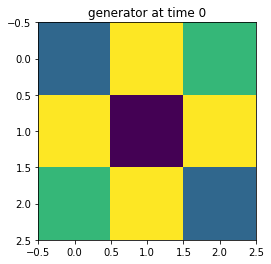

In [7]:
nx = 3
nt = 5
dt = 0.1

dts = np.array([dt for i in range(nt)])
#dts[-1] = 100
Qs = np.dstack([simpleq(nx) for i in range(nt)])

plt.title("generator at time 0")
plt.imshow(Qs[:,:,0])
Qs[:,:,0]

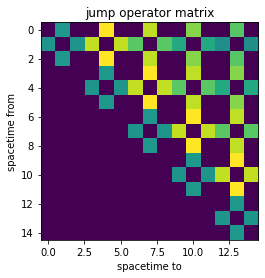

In [8]:
j = ajc.AJCGalerkin(Qs, dts)
plt.title("jump operator matrix")
plt.xlabel("spacetime to")
plt.ylabel("spacetime from")
plt.imshow(j.km)

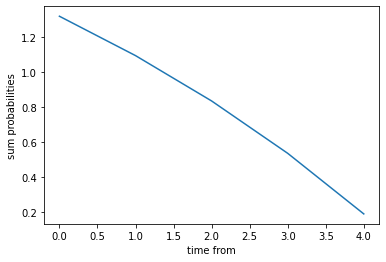

In [56]:
plt.xlabel("time from")
plt.ylabel("sum probabilities")
plt.plot(j.k.sum(axis=(0,2,3)))

In [57]:
p=np.zeros((nx, nt))
p[0,0]=.5
p[-2,0]=.5

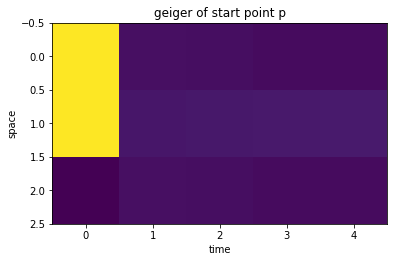

In [58]:
g = j.geiger(p)
plt.xlabel("time")
plt.ylabel("space")
plt.title("geiger of start point p")
plt.imshow(g)

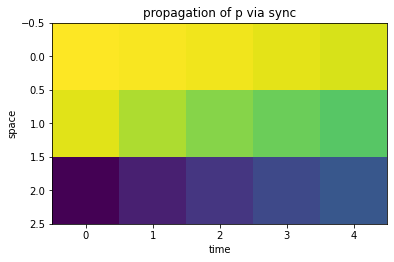

In [59]:
s = j.synchronize(g)
plt.xlabel("time")
plt.ylabel("space")
plt.title("propagation of p via sync")
plt.imshow(s)

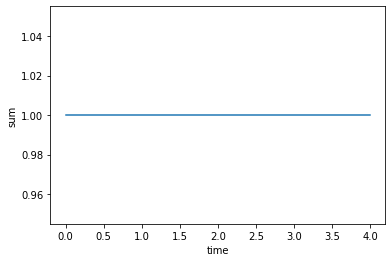

In [60]:
plt.ylabel("sum"); plt.xlabel("time")
plt.plot(s.sum(axis=0))

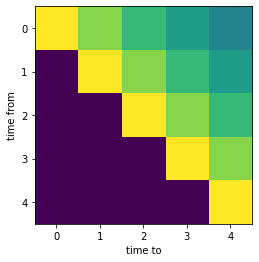

In [61]:
S = j.holding_probs()
plt.ylabel("time from")
plt.xlabel("time to")
plt.imshow(S[1,:,:])

# Committors

## New koopman algorithm

Eine erklaerung

$e=mc^2$

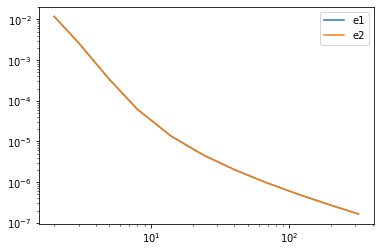

In [63]:
def approx_error2(nt):
    nx =4
    tmax = 1
    dt = tmax / nt

    dts = np.array([dt for i in range(nt)])
    dts=np.append(dts, 0.00001)
    nt = nt+1

    Qs = np.dstack([20*simpleq(nx) for i in range(nt)])
    j = ajc.AJCGalerkin(Qs, dts)

    K = j.koopman_exp()
    K1 = j.koopman_committor()
    K2 = j.koopman_augmented()

    e1 = np.linalg.norm(K1-K)
    e2 = np.linalg.norm(K2-K)

    return e1, e2, K, K1, K2 

ns = np.hstack([[2], np.logspace(0.5, 2.5, 10)]).astype(int)
errors = [approx_error2(i) for i in ns]

[a,b] = plt.plot(ns, [e[0:2] for e in errors])
plt.legend([a,b], ["e1","e2"])
plt.yscale("log")
plt.xscale("log")

In [157]:
S

array([[[0.99501663, 0.98511604, 0.97531398, 0.96560944, 0.95600147],
        [0.        , 0.99501663, 0.98511604, 0.97531398, 0.96560944],
        [0.        , 0.        , 0.99501663, 0.98511604, 0.97531398],
        [0.        , 0.        , 0.        , 0.99501663, 0.98511604],
        [0.        , 0.        , 0.        , 0.        , 0.99501663]],

       [[0.99006633, 0.97046171, 0.95124528, 0.93240936, 0.91394642],
        [0.        , 0.99006633, 0.97046171, 0.95124528, 0.93240936],
        [0.        , 0.        , 0.99006633, 0.97046171, 0.95124528],
        [0.        , 0.        , 0.        , 0.99006633, 0.97046171],
        [0.        , 0.        , 0.        , 0.        , 0.99006633]],

       [[0.99501663, 0.98511604, 0.97531398, 0.96560944, 0.95600147],
        [0.        , 0.99501663, 0.98511604, 0.97531398, 0.96560944],
        [0.        , 0.        , 0.99501663, 0.98511604, 0.97531398],
        [0.        , 0.        , 0.        , 0.99501663, 0.98511604],
        [0.     

In [177]:
(S[:,:,-2] * g[:,None]).T.flatten()[~inds_bnd]

array([0.        , 0.93240936, 0.        , 0.        , 0.95124528,
       0.        , 0.        , 0.97046171, 0.        , 0.        ,
       0.99006633, 0.        ])

In [179]:

inds_inner = ~inds_bnd
np.einsum('is, i -> is', S[:, :, -2], g).T.flatten()[inds_inner]

array([0.        , 0.93240936, 0.        , 0.        , 0.95124528,
       0.        , 0.        , 0.97046171, 0.        , 0.        ,
       0.99006633, 0.        ])

In [143]:
nt

2

In [78]:
j.holding_probs()[:,:,-1]

array([[0.36972499, 0.37344078, 0.37719393, 0.38098479, 0.38481375,
        0.38868119, 0.3925875 , 0.39653307, 0.40051829, 0.40454357,
        0.4086093 , 0.41271589, 0.41686376, 0.42105331, 0.42528496,
        0.42955915, 0.43387629, 0.43823682, 0.44264117, 0.44708979,
        0.45158312, 0.4561216 , 0.4607057 , 0.46533587, 0.47001257,
        0.47473628, 0.47950746, 0.48432659, 0.48919415, 0.49411063,
        0.49907653, 0.50409233, 0.50915854, 0.51427567, 0.51944423,
        0.52466473, 0.5299377 , 0.53526366, 0.54064315, 0.5460767 ,
        0.55156486, 0.55710818, 0.56270721, 0.56836251, 0.57407465,
        0.5798442 , 0.58567173, 0.59155783, 0.59750308, 0.60350809,
        0.60957345, 0.61569976, 0.62188765, 0.62813772, 0.63445061,
        0.64082695, 0.64726736, 0.65377251, 0.66034303, 0.66697959,
        0.67368285, 0.68045347, 0.68729214, 0.69419954, 0.70117636,
        0.7082233 , 0.71534107, 0.72253036, 0.72979192, 0.73712645,
        0.74453469, 0.75201739, 0.75957529, 0.76

In [19]:
# hitting probabilities for all states when starting from state 0 
[j.finite_time_hitting_prob(i)[0] for i in range(nx)]

[1.0, 0.6302750149396639, 0.21199181106396367]

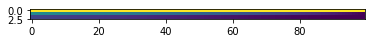

In [20]:
plt.imshow(j.unflatten(j.finite_time_hitting_prob(0)))